# Topic 17: Bayesian Statistics

- onl01-dtsc-ft-022221
- 04/06/21 study group

## Learning Objectives

- Review the concept of conditional probability 
- Learn about Bayes' Theorem
- Apply Bayes Theorem - Bayes' Theorem Lab
- Discuss maximum likelihood estimation (MLE)
- Apply Maximum Likelihood Estimation using a normal distribution

## Advice on Approaching This Section


- Don't let the Monty Hall Problem lab slow you down.
- Don't fret too much about the math behind the MLE section (for now). 
    - If you understand what we do in today's class, that is a better starting point than the lessons
    
- When we get to calculus & gradient descent we will come back and discuss more of the math from the lessons about MLE/MAP

## Additional References

- **Videos**
    - [Bayesian Stats & MLE YouTube Playlist](https://www.youtube.com/playlist?list=PLFknVelSJiSxKhi_xJIbBUZdIn49hDajE)


- **Blog Posts & Articles**
    - https://towardsdatascience.com/probability-concepts-explained-maximum-likelihood-estimation-c7b4342fdbb1
    - [Star Wars Intro To Bayesian Priors](https://www.countbayesie.com/blog/2015/2/18/hans-solo-and-bayesian-priors)


## Questions?

- 


# Conditional Probability - Review


**Conditional probability emerges when the outcome a trial may influence the results of the upcoming trials.**

The conditional probability (Probability of $A$ **given** $B$) can be written as:
$$ P (A \mid B) = \dfrac{P(A \cap B)}{P(B)}$$



$P(A|B)$, is the probability A **given** that $B$ has just happened. 


## Laws & Theorems Based on Conditional Probability


### Theorem 1: Product Rule

The intersection of events $A$ and $B$ can be given by

\begin{align}
    P(A \cap B) = P(B) P(A \mid B) = P(A) P(B \mid A)
\end{align}



### Theorem 2: Chain Rule AKA "General Product Rule"

- Allows calculation of any member of the join distribution of a set of random variables using _only_ conditional probabilities.

- Built on the product rule: 
$$P(A \cap B) = P(A \mid B) P(B)$$





# Bayes' Theorem

- Starts with the formula for conditional probability/likelihood:

$$ P(A|B) = \dfrac{P(A \cap B)}{P(B)}$$

- Substitute $P(B|A)P(A)$ for $P(A \cap B)$ using the product rule and we get:



#### Bayes' Theorem

$$ \large P(A|B) = \frac{P(B|A)P(A)}{P(B)} $$


- Note that, using Bayes theorem, you can compute conditional probabilities without explicitly needing to know $P(A \cap B)$! 

# Activity: Bayes' Theorem - lab

In [40]:
def bayes(P_a, P_b, P_b_given_a):
    # Your code here
    P_a_given_b = (P_b_given_a*P_a)/P_b
    return P_a_given_b

### Skin Cancer

After a physical exam, a doctor observes a blemish on a client's arm. The doctor is concerned that the blemish could be cancerous, but tells the patient to be calm and that it's probably benign. Of those with skin cancer, 100% have such blemishes. However, 20% of those without skin cancer also have such blemishes. If 15% of the population has skin cancer, **what's the probability that this patient has skin cancer?**

> Hint: Be sure to calculate the overall rate of blemishes across the entire population.


$$ \large P(A|B) = \frac{P(B|A)P(A)}{P(B)} $$


- Must apply the Law of Total Probability to get P_blemish


In [41]:
# Your code here
# A = cancer. B= blemish

P_blemish_given_cancer = 1 # P(B|A)
P_blemish_given_notcancer = 0.2 # P(B|A')

P_cancer = .15 # P(A)
P_notcancer = 1- P_cancer # P(A')

P_blemish = P_blemish_given_cancer*P_cancer + P_blemish_given_notcancer*P_notcancer
P_blemish

0.32

In [42]:
P_cancer_given_blemish = bayes(P_cancer,P_blemish,P_blemish_given_cancer )
P_cancer_given_blemish

0.46875

### Children (I) 
 
A couple has two children. the younger of which is a boy. What is the probability that they have two boys?

In [43]:
# Your solution P(2boys|younger child is a boy) #A =0.5

# B = P(younger_boy)
P_younger_boy = 0.5

# A = P(2boys)
P_2boys = 0.5*0.5

# B|A = P(s)
P_younger_boy_given_2boys = 1



P_2boys_given_younger_boy = bayes(P_2boys,P_younger_boy,P_younger_boy_given_2boys)
P_2boys_given_younger_boy

0.5

### Children  (II)

A couple has two children, one of which is a boy. What is the probability that they have two boys?

In [44]:
# Your solution P(2boys|1 of 2 children is a boy) #A=0.33
## BB, BG, GG, GB
P_2boys =.25
P_1boy = .75
P_1_boy_given_2boys= 1

P_2boys_given_1boy = bayes(P_2boys, P_1boy, P_1_boy_given_2boys)
P_2boys_given_1boy

0.3333333333333333

### A diagnostic test


A diagnostic test is advertised as being 99% accurate 

* If a patient has the disease, they  will test positive 99% of the time 

* If they don't have the disease, they will test negative 99% of the time  

* 1% of all people have this disease 

If a patient tests positive, what is the probability that they actually have the disease?

In [45]:
# Your solution P(Disease | positive test) # A=0.5
P_disease =.01
P_no_disease = 1-P_disease


P_positive_given_disease = .99
P_postiive_given_no_disease = .01

P_positive= P_postiive_given_no_disease*P_no_disease+ P_positive_given_disease*P_disease

P_disease_given_pos = bayes(P_disease,P_positive,P_positive_given_disease)
P_disease_given_pos

0.5

## Optional Activity > Topic 17 Optional Practice Problems

- in `Topic17-BayesPractice.ipynb`
- (Unverified) solution branch added right before study group

# Maximum Likelihood Estimation


MLE primarily deals with **determining the parameters ($\theta$'s)** that **maximize the probability/liklihood of observing the data**. 

## Parameter Inference

> - If we have a number of observations for a phenomenon that we do not know the probability/parameters for, we can use the probability of seeing those observations (the likelihood) for different probabilities/parameters until we find the value for the parameter that maximizes our chances of seeing the observed data.'


### MLE Assumptions

- Observations are independent 
- Observations are identically distributed


> These assumptions are so common they have been given an abbreviation: "the i.i.d. assumption (independent and identically distributed samples)

<!---<img src ="https://raw.githubusercontent.com/learn-co-students/dsc-mle-online-ds-pt-100719/master/images/der.png">--->

# Activity: Using MLE to find the Mean and Std for Male Height

> Use MLE to find find the mean height and standard deviation for males.

In [46]:
# ! pip install -U fsds
from fsds.imports import *
df = fs.datasets.load_height_weight()
df

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [47]:
## Separate Out Males' height
df_male = df.groupby('Gender').get_group("Male")['Height']

## Take a small sample (n=100) using random_state 123
male_sample = df_male.sample(100, random_state=123)
male_sample

2648    69.569235
2456    68.035724
4557    65.102935
4884    64.585263
92      70.640530
          ...    
1182    74.758752
1898    72.439501
2736    68.929542
1003    67.805312
3022    68.914623
Name: Height, Length: 100, dtype: float64

[Text(0.5, 1.0, 'Observed Male Heights'), Text(0.5, 0, 'Height (inches)')]

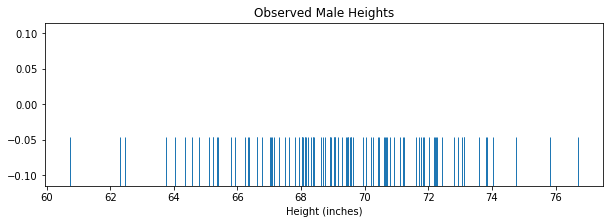

In [48]:
## Rug Plot of Male Heights Sample
fig,ax=plt.subplots(figsize=(10,3))
ax = sns.rugplot(male_sample,ax=ax,height=0.3)
ax.set(title='Observed Male Heights', 
       xlabel='Height (inches)')

## Task: Use MLE to Determine the Most Likely Mean and Std of Male Height

- How can we figure out the most likely population mean and std for males?

In [49]:
from scipy import stats
## Make a guess of mean=70, std=4
mu=70
std=4

In [50]:
## Generate 100 data points in the range of male_height (xs)
xs = np.linspace(male_sample.min(),male_sample.max(), 100)

## Generate a normal distribution (ys) using the xs 
ys = stats.norm(loc=mu, scale=std).pdf(xs)

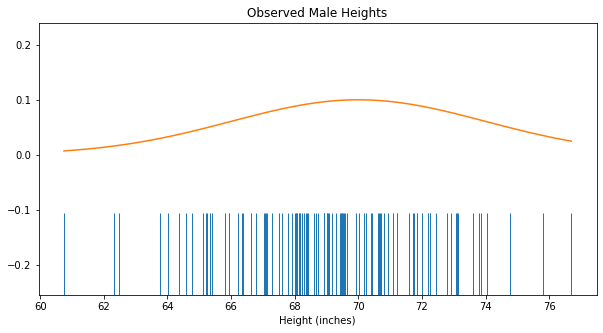

In [51]:
fig,ax=plt.subplots(figsize=(10,5))
ax = sns.rugplot(male_sample,ax=ax,height=0.3)
ax.set(title='Observed Male Heights', 
       xlabel='Height (inches)')
ax.plot(xs, ys)

In [52]:
## functionize the above process
def plot_male_height(male_sample, mu, std):
    """Plot a rugplot of the male_sample 
    vs the normal distribution defined by mu and std."""

    ## Plot Male Heights
    fig,ax=plt.subplots(figsize=(10,5))
    ax = sns.rugplot(male_sample,ax=ax,height=0.1)
    ax.set(title='Observed Male Heights', xlabel='Height (inches)')
    
    ## Generate a normal distribution (ys) using the xs 
    xs = np.linspace(male_sample.min(),male_sample.max(),100)
    pop = stats.norm(loc=mu,scale=std).pdf(xs)
    
    ax.plot(xs,pop,label=f"Generated Dist (mu={mu}, std={std})")
    ax.axvline(mu,c='k',ls=':',label=f"Mean={mu}")
    ax.legend()
 

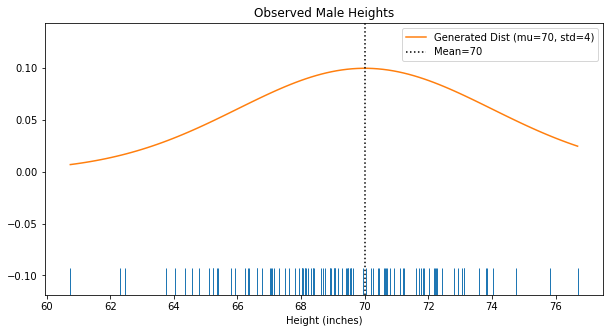

In [53]:
## test our function for mu=70, std=4
plot_male_height(male_sample,mu,std)

## The Probability Density Function for the Normal Distribution

https://towardsdatascience.com/maximum-likelihood-estimation-explained-normal-distribution-6207b322e47f

The probability density function equation for the normal distribution is given by the following expression:

$$ \large P(x) = \dfrac{1}{\sigma \sqrt {2\pi }}e^{-\dfrac{(x-\mu)^2}{2\sigma^2}}$$

Here, 
- $\mu$ is the mean
- $\sigma$ is the standard deviation
- $\pi \approx 3.14159 $ 
- $ e \approx 2.71828 $

> https://nbviewer.jupyter.org/github/learn-co-curriculum/dsc-normal-distribution/blob/master/index.ipynb

In [54]:
import math
import numpy as np

def calc_likelihood(x,mu,std):
    """Write a function to calculate the expected value at 
    a particular point using the equation above."""
   
    e_num = math.e**((-1*(x-mu)**2)/(2*std**2))
    denom = std * np.sqrt(math.pi*2 )
    return 1/denom*e_num

def calc_total_likelihood(xs,mu,std):
    """Write a function that will get the likelihood 
    for each x value so we can get the product of the total probability"""
  
    likelihoods = []
    for x in xs:
        likelihoods.append(calc_likelihood(x,mu,std))
    likelihoods = np.array(likelihoods)
    return likelihoods.prod()
    
    

In [55]:
likelihoods = []
for x in male_sample:
    likelihoods.append(calc_likelihood(x,mu,std))
likelihoods = np.array(likelihoods)
likelihoods.prod()

7.123494597622488e-114

In [56]:
 calc_total_likelihood(male_sample,70,4)

7.123494597622488e-114

In [57]:
## Reminder about our mu and std
mu,std

(70, 4)

In [58]:
## Calculate total liklihood for our 
calc_total_likelihood(male_sample, mu,std)

7.123494597622488e-114

## Parameter Inference

> We want to infer which of these values best matches the true Mean and Std of male height.

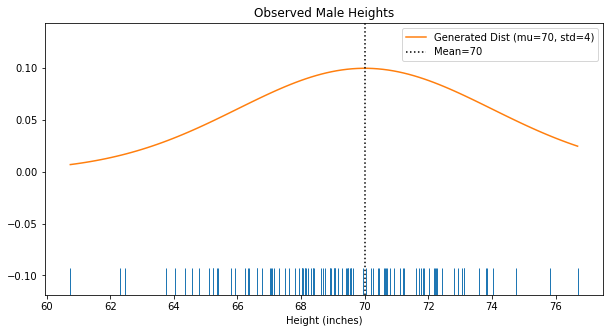

In [59]:
plot_male_height(male_sample,mu,std)

In [79]:
import itertools
## Make a list of mus and stds to try
# theta_mus = [40,45,50,60,62,64,66,68,70, 72,74, 80]
theta_mus = np.arange(40,80,0.1)
# theta_stds = [0.5,0.8, 1,1.2,1.5,2.5,3,3.5,4,4.5]
theta_stds = np.arange(0.5, 4.5,0.1)

## make all possible permutations of params
theta_params = list(itertools.product(theta_mus, theta_stds))
theta_params

[(40.0, 0.5),
 (40.0, 0.6),
 (40.0, 0.7),
 (40.0, 0.7999999999999999),
 (40.0, 0.8999999999999999),
 (40.0, 0.9999999999999999),
 (40.0, 1.0999999999999999),
 (40.0, 1.1999999999999997),
 (40.0, 1.2999999999999998),
 (40.0, 1.4),
 (40.0, 1.4999999999999998),
 (40.0, 1.5999999999999996),
 (40.0, 1.6999999999999997),
 (40.0, 1.7999999999999998),
 (40.0, 1.8999999999999997),
 (40.0, 1.9999999999999996),
 (40.0, 2.0999999999999996),
 (40.0, 2.1999999999999997),
 (40.0, 2.3),
 (40.0, 2.3999999999999995),
 (40.0, 2.4999999999999996),
 (40.0, 2.5999999999999996),
 (40.0, 2.6999999999999993),
 (40.0, 2.7999999999999994),
 (40.0, 2.8999999999999995),
 (40.0, 2.9999999999999996),
 (40.0, 3.0999999999999996),
 (40.0, 3.1999999999999993),
 (40.0, 3.2999999999999994),
 (40.0, 3.3999999999999995),
 (40.0, 3.499999999999999),
 (40.0, 3.599999999999999),
 (40.0, 3.6999999999999993),
 (40.0, 3.7999999999999994),
 (40.0, 3.8999999999999995),
 (40.0, 3.999999999999999),
 (40.0, 4.1),
 (40.0, 4.1999999999

In [80]:
## Calculate the most likely parameters for mu, std
compare = [['Mu','Std','Likelihood']]
## For each pair of mu,std, calculate total likelihood.
for (theta_mu, theta_std) in theta_params:
    res = calc_total_likelihood(male_sample,theta_mu, theta_std)
    compare.append([theta_mu, theta_std, res])
## Turn it into a df for convenience
results = pd.DataFrame(compare[1:],columns=compare[0])
results

,Mu,Std,Likelihood
0,40.0,0.5,0.000000e+00
1,40.0,0.6,0.000000e+00
2,40.0,0.7,0.000000e+00
3,40.0,0.8,0.000000e+00
4,40.0,0.9,0.000000e+00
...,...,...,...
15995,79.9,4.0,9.296228e-271
15996,79.9,4.1,1.211878e-263
15997,79.9,4.2,4.432218e-257
15998,79.9,4.3,5.125055e-251


In [81]:
results.sort_values('Likelihood',ascending=False,inplace=True)
results=results.reset_index(drop=True)
results.head()

,Mu,Std,Likelihood
0,69.1,3.0,1.298592e-109
1,69.2,3.0,1.244604e-109
2,69.1,2.9,1.241459e-109
3,69.0,3.0,1.212437e-109
4,69.2,2.9,1.186308e-109


<AxesSubplot:xlabel='Height', ylabel='Count'>

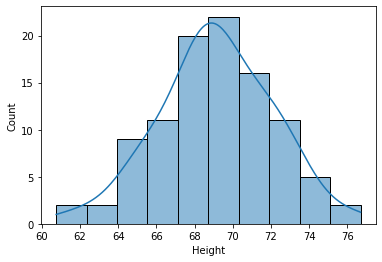

In [82]:
sns.histplot(male_sample,kde=True)

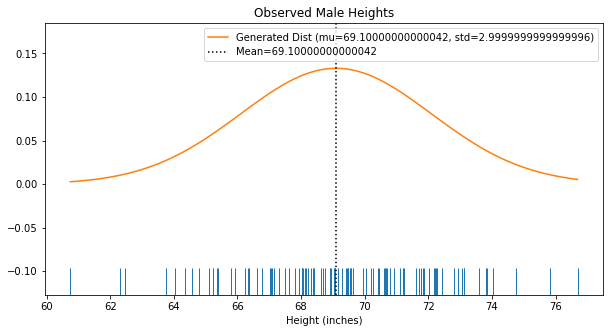

In [83]:
## View the 5 params with the highest likelihood
plot_male_height(male_sample,results.loc[0,'Mu'] ,results.loc[0,'Std'] )

In [84]:
male_sample.agg(['mean','std'])

mean    69.111783
std      2.983733
Name: Height, dtype: float64

In [85]:
## Get the actual mean and std from the full population
df_male.agg(['mean','std'])

mean    69.026346
std      2.863362
Name: Height, dtype: float64

In [76]:
df_male.shape

(5000,)